<a href="https://colab.research.google.com/github/Suryansh-patidar/ML_LS2024/blob/main/assignment_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ASSIGNMENT
#Dataset
Assume you are a scientist who is trying to make a propellent and is trying many tests to make an efficient propellent .
<br>
You have performed two tests.
<br>
From the two tests you would like whether this propellent works efficiently or not.
Build your own logistic regression model to decide .
<br>
Text with "DO NOT EDIT THIS CODE" needs to be only run do not edit it


In [15]:
#import libraries
#write your code.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math




In [3]:
#load data

#write your code
data = np.loadtxt('data.txt',delimiter=',')
X_train = data[:,0:2]
y_train = data[:,2]


In [4]:
#plot data to visualise
def plot_data(X,y,positive_label="y=1", negative_label="y=0"):
#positive_label and negative_label refers to classes of y as y can be 0 or 1
#While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for X
#write your code
  plt.plot(X[y==0,0],X[y==0,1],'o',label=negative_label)
  plt.plot(X[y==1,0],X[y==1,1],'x',label=positive_label)



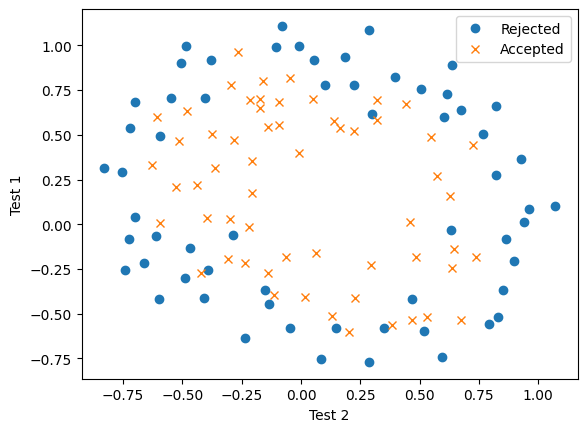

In [6]:
#test
plot_data(X_train, y_train[:], positive_label="Accepted", negative_label="Rejected")


plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()


In [50]:
#feature mapping
def map_feature(X1,X2):
#write your code
  X1=np.atleast_1d(X1)
  X2=np.atleast_1d(X2)
  degree=3
  out=[]
  for i in range(1,degree+1):
    for j in range(i+1):
      out.append((X1**(i-j) * (X2**j)))
  return np.stack(out, axis=1)



In [51]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 9)


In [52]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [53]:
#sigmoid function
def sigmoid(z):
#write your code
  return 1/(1+np.exp(-z))



In [54]:
sigmoid_test(sigmoid)


Tests passed!


In [55]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [56]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
#write your code
  m=X.shape[0]
  z_wb=np.dot(X,w)+b
  h=sigmoid(z_wb)
  cost = -(1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
  # reg_cost = lambda_/(2*m)*np.sum(w**2)
  total_cost=cost

  return total_cost

In [57]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.777
Tests passed!


In [58]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
#write your code
  m=X.shape[0]
  cost = compute_cost(X,y,w,b,lambda_)
  reg_cost = lambda_/(2*m)*np.sum(w**2)
  total_cost=cost+reg_cost



  return total_cost

In [59]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [60]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6602114800448178
All tests passed!


In [61]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [62]:
#compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
#write your code
  m=X.shape[0]
  z_wb=np.dot(X,w)+b
  h=sigmoid(z_wb)
  dj_db=-(1/m)*np.sum(y-h)
  dj_dw=np.dot(X.T,(h-y))/m


  return dj_db,dj_dw

In [63]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.4915254236924827
dj_dw at test_w: [-0.008601361012465381, -0.09147300847306207]
Tests passed!


In [67]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
#write your code
  m=X.shape[0]
  dj_db,dj_dw=compute_gradient(X,y,w,b,lambda_)
  for i in range(len(w)):
    dj_dw[i] += lambda_/m*w[i]
  # dj_dw=dj_dw.reshape(w.shape)

  return dj_db,dj_dw

In [68]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [69]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07240217665189631
Tests passed!


In [92]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01
iterations =60000
alpha = 0.05
def gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_):

  #write your code
  w=initial_w
  b=initial_b
  J_history=[]
  for i in range(iterations):
    dj_db,dj_dw=compute_gradient_reg(X_mapped,y_train,w,b,lambda_)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db
    J_history.append(compute_cost_reg(X_mapped,y_train,w,b,lambda_))
    if i%100==0:
      print(f"iteration {i}: cost {J_history[-1]}")


  return w, b, J_history, _

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)


iteration 0: cost 0.721416092831179
iteration 100: cost 0.6271197842947088
iteration 200: cost 0.6123620708472375
iteration 300: cost 0.6020230324100437
iteration 400: cost 0.5924758720402372
iteration 500: cost 0.5834959729226231
iteration 600: cost 0.5750291140018591
iteration 700: cost 0.5670355087453501
iteration 800: cost 0.559480312599838
iteration 900: cost 0.5523321437383436
iteration 1000: cost 0.5455624374074572
iteration 1100: cost 0.5391450511761453
iteration 1200: cost 0.5330559874660064
iteration 1300: cost 0.5272731782053329
iteration 1400: cost 0.5217763057730423
iteration 1500: cost 0.5165466475806775
iteration 1600: cost 0.5115669378060264
iteration 1700: cost 0.5068212427349802
iteration 1800: cost 0.5022948475998578
iteration 1900: cost 0.4979741535144693
iteration 2000: cost 0.49384658347185106
iteration 2100: cost 0.489900496568337
iteration 2200: cost 0.48612510973360773
iteration 2300: cost 0.482510426322497
iteration 2400: cost 0.47904717098094546
iteration 250

In [93]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):
#write your code
  x1=np.linspace(-1,1.5,100)
  x2=np.linspace(-1,1.5,100)
  X1,X2=np.meshgrid(x1,x2)
  z=np.zeros((X1.shape[0],X1.shape[1]))
  for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
      z[i,j]=np.dot(map_feature(X1[i,j],X2[i,j]),w)+b
  z=z.T
  plt.contour(X1,X2,z,0)
  plot_data(X,y)
  plt.show()
  return





<ipython-input-93-b2579545e832>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j]=np.dot(map_feature(X1[i,j],X2[i,j]),w)+b


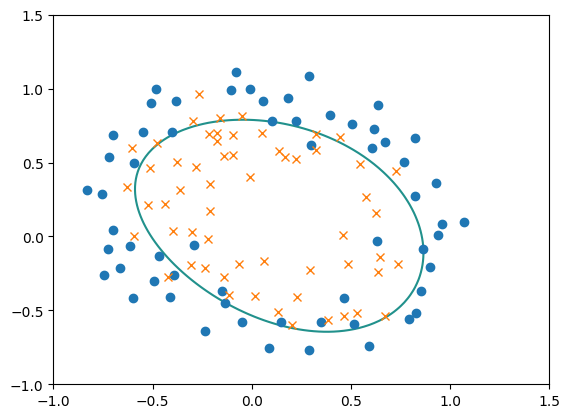

In [94]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [95]:
#predict your training model
def predict(X, w, b):
  m,n=X.shape
  p=np.zeros(m)
  #write your code
  z=np.dot(X,w)+b
  for i in range(m):
    if sigmoid(z[i])>=0.5:
      p[i]=1
    else:
      p[i]=0





  return p

In [96]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

Accuracy of training model: 84.745763
